# Content

In this notebook we run our algorithm to distinguish the classes of the SP data. Each point represents two classes and and one day. The pipeline goes as follows

* We first load the data from the `SP_Classes_2_per_day` folder
* We then generate the embeddings
* For visualization porpuses we plot the embeddings in 2 dimensions using *UMAP* algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import matplotlib.cm as cm
from collections import Counter
from matplotlib.colors import Normalize
import umap

import sys
sys.path += ['Package']

from MatrixDistance import *

import warnings
warnings.filterwarnings("ignore")

2024-07-18 17:19:34.350351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-18 17:19:34.350370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# # load the data
# ROOT = 'Data/SP_Classes_2_per_day/'
# all_files = listdir(ROOT)

# n = len(all_files)
# gt = [x.split('-')[0] for x in all_files]

# DFT = []

# for file in all_files:
#     DFT.append(pd.read_csv(ROOT + file))
    
# school = np.array([x.split('-')[0] for x in all_files])
# classes = np.array([x.split('-')[1] for x in all_files])
    
# # generate the embeddings
# λlist = []

# for i in range(n):
#     # print progress
#     print(str(i+1) + '/' + str(n), end = '\r')
    
#     N = len(np.unique(DFT[i][['i', 'j']].values))
#     X = GraphDynamicEmbedding(DFT[i], dim = 32, n = N, n_epochs = 30, η = 1)
#     λlist.append(np.linalg.eigvalsh(X.T@X))
    
# np.savetxt('Data/Embeddings/2PerClass.dat', np.array(λlist))

In [20]:
Xclass = np.loadtxt('Data/Embeddings/2PerClass.dat')
Xclass_embedded = umap.UMAP(n_neighbors = 500, min_dist = 1).fit_transform(Xclass)

all_files = listdir('Data/SP_Classes_2_per_day/')
gt = [x.split('-')[0] for x in all_files]

# synthetic data
Xsynth = np.loadtxt('Data/Embeddings/Synthetic/embs_32.txt')
n_graphs = 250
Xsynth_embedded = umap.UMAP(n_neighbors = 500, min_dist = 1).fit_transform(Xsynth)
gt_synth = np.concatenate([[i for x in range(n_graphs)] for i in range(4)])
size = np.loadtxt('Data/Embeddings/Synthetic/size_32.txt')

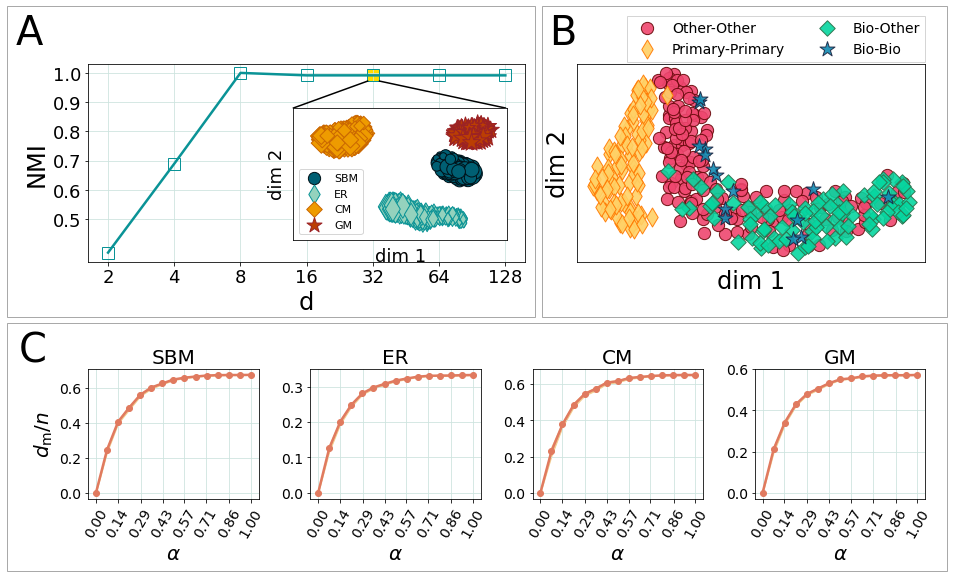

In [134]:
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(15, 8))

# Creazione di una griglia di specifiche (GridSpec)
gs = GridSpec(13, 19)


ax1 = plt.subplot(gs[0:6, :10]) 
ax2 = plt.subplot(gs[0:6, 11:])
ax3 = plt.subplot(gs[9:, :4]) 
ax4 = plt.subplot(gs[9:, 5:9]) 
ax5 = plt.subplot(gs[9:, 10:14])  
ax6 = plt.subplot(gs[9:, 15:]) 

ax = [ax1, ax2, ax3, ax4, ax5, ax6]

vary_d = np.loadtxt('Data/Embeddings/Synthetic/vary_d.dat')

ax[0].plot(np.log2(vary_d[0]), vary_d[1], marker = 's', markersize = 12, fillstyle = 'none', color = '#0a9396',
          linewidth = 2.5)
ax[0].set_xticks(np.log2(vary_d[0]), vary_d[0].astype(int), fontsize = 18)
ax[0].set_xlabel('d', fontsize = 24)
t = np.linspace(0.5, 1, 6)
ax[0].set_yticks(t, t, fontsize = 18)
ax[0].set_ylabel('NMI', fontsize = 24)


ax[0].scatter(5, vary_d[1][4], marker = 's', s = 150, color = '#ffdd00')
ax[0].plot([4.92, 3.8], [0.972, 0.88], color = 'k')
ax[0].plot([5.1, 7], [0.972, 0.88], color = 'k')

ax[0].text(-0.4, 1.1, 'A', fontsize = 40)

##########################################################################################################

left, bottom, width, height = [0.315, 0.575, 0.198, 0.228]
axins = fig.add_axes([left, bottom, width, height])

norm = Normalize(vmin = 0, vmax = 6)
cmap = cm.Oranges

m = cm.ScalarMappable(norm=norm, cmap=cmap)


labels = ['SBM', 'ER', 'CM', 'GM']

colors = ['#005f73', '#94d2bd', '#ee9b00', '#bb3e03']
colors2 = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2']

edgecolors = ['#001219', '#0a9396', '#ca6702', '#9b2226']
edgecolors2 = ['#660708', '#ff7900', '#2c6e49', '#1c2541',]
markers = ['o', 'd', 'D', '*', 's']
sizes = [150, 180, 120, 250, 200]

X_ = copy(Xsynth_embedded)

X_[:,0] = X_[:,0] - X_[:,0].mean()
X_[:,1] = X_[:,1] - X_[:,1].mean()


for i in [0, 1, 2, 3]:

    axins.scatter(X_[:,0][gt_synth == i], X_[:,1][gt_synth == i], marker = markers[i], 
            color = colors[i], edgecolor = edgecolors[i], label = labels[i], 
                  s = sizes[i]/1000*np.array(size)[gt_synth == i])
    

axins.legend(loc = 3, fontsize = 11, ncol = 1)
f = 0.25
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim((1+f)*np.min(X_[:,0]), (1+f)*np.max(X_[:,0]))
axins.set_ylim((1+f)*np.min(X_[:,1]), (1+f)*np.max(X_[:,1]))
axins.set_xlabel('dim 1', fontsize = 18)
axins.set_ylabel('dim 2', fontsize = 18)


##########################################################################################################

school = np.array([x.split('-')[0] for x in all_files])
classes = np.array([x.split('-')[1] for x in all_files])
classes1 = [x.split('_')[0] for x in classes]
classes2 = [x.split('_')[1] for x in classes]


ClassMapper = {'1A': 0, '1B': 0, '2A': 0, '2B': 0,
'2BIO1': 1, '2BIO2': 1, '2BIO3': 1, '3A': 0,
'3B': 0, '4A': 0, '4B': 0, '5A': 0,
'5B': 0, 'MP': 2, 'MP*1': 2, 'MP*2': 2, 
'PC': 2, 'PC*': 2, 'PSI*': 2}


cl = [tuple([ClassMapper[x], ClassMapper[y]]) for x, y in zip(classes1, classes2)]

all_classes = list(Counter(cl).keys())

MapperNames = {0: 'Primary', 1: 'Bio', 2: 'Other'}

school = np.array([x.split('-')[0] for x in all_files])
schools = np.unique(school)

for i, s in enumerate(all_classes):
    idx = np.array([x == s for x in cl])
    ax[1].scatter(Xclass_embedded[:,0][idx], Xclass_embedded[:,1][idx], marker = markers[i], 
                      edgecolor = edgecolors2[i], s = sizes[i], color = colors2[i],
                  label = MapperNames[s[0]] + '-' + MapperNames[s[1]], alpha = 0.9)

    

ax[1].legend(bbox_to_anchor=(1.02, 1.28), ncol = 2, fontsize = 14, fancybox = False, shadow = False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('dim 1', fontsize = 24)
ax[1].set_ylabel('dim 2', fontsize = 24)

ax[1].text(-.8, 8.6, 'B', fontsize = 40)

ax[0].grid(color = '#cce3de')
# ax[0].patch.set_facecolor('#e9ecef')


names = ['DCSBM', 'ER', 'Configuration model', 'GeometricModel']
names_ = ['SBM', 'ER', 'CM', 'GM']
dist = []

for i, name in enumerate(names):
    dist.append(pd.read_csv(f'Data/Partially_shuffled_nodes/{name}.csv'))
    
    
αv = np.linspace(0,1,15)

for i in range(4):
    d = dist[i]
    m = np.mean(d, axis = 1)
    s = np.std(d, axis = 1)
    ax[i+2].plot(αv, m, color = '#e07a5f', marker = 'o', linewidth = 2.5)
    ax[i+2].set_xticks([np.round(α, 2) for i, α in enumerate(αv) if i%2 == 0])
    ax[i+2].fill_between(αv,  m-s, m+s, color = '#f2cc8f')
    ax[i+2].tick_params(axis='x', which='major', labelsize=14, rotation = 60)
    ax[i+2].tick_params(axis='y', which='major', labelsize=14)
    ax[i+2].set_title(names_[i], fontsize = 20)
#     ax[i+2].patch.set_facecolor('#e9ecef')
    ax[i+2].grid(color = '#cce3de')
    ax[i+2].set_xlabel(r'$\alpha$', fontsize = 20)

ax[2].set_ylabel(r'$d_{\rm m}/n$', fontsize = 20)
ax[2].text(-0.5, .75, 'C', fontsize = 40)


rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.05, 0.44), .489, .54, fill = False, color = "darkgrey", lw = 1, 
    zorder=1000, transform=fig.transFigure, figure=fig)

rect2 = plt.Rectangle(
    # (lower-left corner), width, height
    (0.545, 0.44), .375, .54, fill = False, color = "darkgrey", lw = 1, 
    zorder=1000, transform=fig.transFigure, figure=fig)

rect3 = plt.Rectangle(
    # (lower-left corner), width, height
    (0.05, 0), 0.87, 0.43, fill = False, color = "darkgrey", lw = 1, 
    zorder = 1000, transform = fig.transFigure, figure = fig)

fig.patches.extend([rect, rect2, rect3])


plt.tight_layout()

plt.show()